<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow를 활용한 신경망 훈련

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

TensorFlow 2.x selected.


'2.1.0'

In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 34kB/s 


### tensorflow version 1.x

In [0]:
# 그래프 생성
g = tf.Graph()
with g.as_default():
  x = tf.compat.v1.placeholder(dtype = tf.float32, shape = (None), name = 'x')
  w = tf.Variable(2.0, name = 'weight')
  b = tf.Variable(0.7, name = 'bias')

  z = w * x + b
  init = tf.compat.v1.global_variables_initializer()

#세션 생성, g전달
with tf.compat.v1.Session(graph = g) as sess:
  # w와 b를 초기화
  sess.run(init)
  # z를 평가
  for t in [1.0, 0.6,-1.8]:
    print('x = %4.1f --> z = %4.1f' % (t, sess.run(z, feed_dict = {x:t})))


x =  1.0 --> z =  2.7
x =  0.6 --> z =  1.9
x = -1.8 --> z = -2.9


In [0]:
with tf.compat.v1.Session(graph = g) as sess:
  sess.run(init)
  print(sess.run(z, feed_dict = {x:[1.,2.,3.]}))


[2.7 4.7 6.7]


In [0]:
print(z)

Tensor("add:0", dtype=float32)


### tensorflow vesion 2.x

변수초기화나 Session등이 불필요함

In [0]:
w = tf.Variable(2.0, name = 'weight')
b = tf.Variable(0.7, name = 'bias')

# z를 평가
for x in [1.0, 0.6, -1.8]:
  z = w * x + b
  print('x = %4.1f --> z = %4.1f' % (x, z))

x =  1.0 --> z =  2.7
x =  0.6 --> z =  1.9
x = -1.8 --> z = -2.9


In [0]:
print(z)

tf.Tensor(-2.8999999, shape=(), dtype=float32)


In [0]:
z = w *[1., 2., 3.] + b
print(z.numpy())

[2.7 4.7 6.7]


## tensorflow로 배열다루기

In [0]:
import tensorflow as tf
import numpy as np

# 3*2*3 배열 생성
x_array = np.arange(18).reshape(3,2,3)
# 텐서를 일렬로 펼침
x2 = tf.reshape(x_array, shape = (-1, 6))

xsum = tf.reduce_sum(x2, axis = 0)
xmean = tf.reduce_mean(x2, axis = 0)

print('입력 크기:', x_array.shape)
print('크기가 변경된 입력: \n', x2.numpy())
print('열의 합:\n', xsum.numpy())
print('열의 평균:\n', xmean.numpy())

입력 크기: (3, 2, 3)
크기가 변경된 입력: 
 [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]]
열의 합:
 [18 21 24 27 30 33]
열의 평균:
 [ 6  7  8  9 10 11]


## tensorflow로 저수준 API모델 개발

In [0]:
# dataset 생성
import tensorflow as tf
import numpy as np

X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

In [0]:
# 선형회귀 클래스 생성(경사하강법)
class TfLinreg(object):
  def __init__(self, learning_rate = 0.01):
    self.w = tf.Variable(tf.zeros(shape = (1)))
    self.b = tf.Variable(tf.zeros(shape = (1)))
    #경사하강법 옵티마이저 설정
    self.optimizer = tf.keras.optimizers.SGD(lr = learning_rate)

  def fit(self, X, y, num_epochs = 10):
    training_costs = []
    for step in range(num_epochs):
      #자동 미분을 위해 연산과정 기록
      with tf.GradientTape() as tape:
        z_net = self.w * X + self.b
        z_net = tf.reshape(z_net, [-1])
        sqr_errors = tf.square(z_net - y)
        mean_cost = tf.reduce_mean(sqr_errors)

      # 비용함수에 대한 가중치 그래디언트 계산
      grads = tape.gradient(mean_cost, [self.w, self.b])
      # 옵티마이저에 그래디언트 반영
      self.optimizer.apply_gradients(zip(grads, [self.w, self.b]))
      # 비용함수의 값을 저장
      training_costs.append(mean_cost.numpy())

    return training_costs
    
  def predict(self, X):
    return self.w * X + self.b

In [0]:
lrmodel = TfLinreg()
training_costs = lrmodel.fit(X_train, y_train)

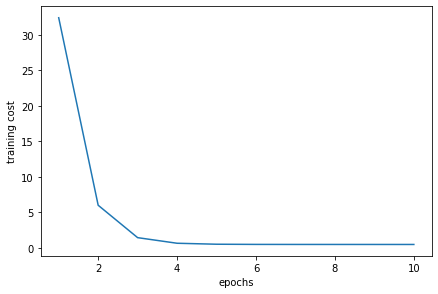

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel('epochs')
plt.ylabel('training cost')
plt.show()

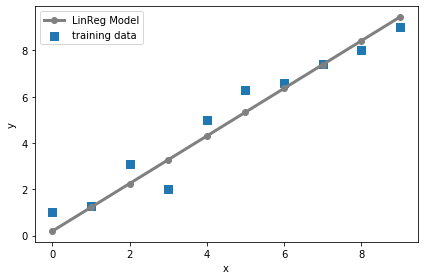

In [0]:
plt.scatter(X_train, y_train, marker = 's',  s = 50, label = 'training data')
plt.plot(range(X_train.shape[0]), lrmodel.predict(X_train), color = 'gray', marker = 'o', markersize = 6, linewidth = 3, label = 'LinReg Model')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.legend()
plt.show()